In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/specaugmentfeatures/X_train_Specfeatures.csv
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_tip_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_keg_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_pole_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_puff_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_such_sad.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_mob_sad.wav
/kaggle/input/toronto-emotional-speech

/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_neat_happy.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_keep_happy.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_laud_happy.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_door_happy.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_note_happy.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_team_happy.wav
/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_when_ps.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_long_ps.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_wash_ps.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_pike_ps.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_mouse_ps.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_mob_ps.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_tire_ps.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_kill

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_gap_angry.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_rose_angry.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_gaze_angry.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_witch_angry.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_king_angry.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional sp

In [72]:
import librosa
import argparse
import keras
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import glob
from sklearn.metrics import confusion_matrix

import os
import sys
import warnings
import IPython.display as ipd
import seaborn as sns
import glob
import pickle
import json
import torch
from tqdm import tqdm
input_duration=3

#FOR CREATING MODEL IMPORT LIBS
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [73]:
TESS = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
dir_list = os.listdir(TESS)
dir_list.sort()
#print(dir_list)

path = []
emotion = []
gender = []


for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname: 
        part = f.split(".")[0].split('_')
        tmp = part[0]
        if tmp == 'OAF':
            tmp = 'male'
        else : 
            tmp = 'female'
        gender.append(tmp)
        emotion.append(part[2])
        path.append(TESS + i + '/' + f)

TESS_df = pd.DataFrame(emotion)
TESS_df = pd.concat([pd.DataFrame(gender), TESS_df], axis = 1)
TESS_df.columns = ['gender','emotion']
TESS_df['labels'] = TESS_df.gender + "_" + TESS_df.emotion
TESS_df['source'] = TESS
TESS_df = pd.concat([TESS_df, pd.DataFrame(path,columns = ['path'])], axis = 1)
TESS_df = TESS_df.drop(['gender', 'emotion','source'], axis = 1)
TESS_df["labels"].replace({"male_ps": "male_surprise", "female_ps": "female_surprise"}, inplace=True)  
from sklearn.utils import shuffle
TESS_df = TESS_df.sample(frac = 1,random_state= 42) 
TESS_df_new = TESS_df

In [74]:
X_train, X_test, y_train, y_test = train_test_split(TESS_df_new, TESS_df_new.labels, test_size = 0.25, shuffle = True, random_state = 42)

In [75]:
#X_train feature extraction
X_train_features = pd.DataFrame(columns = ['features'])
counter = 0
for index,path in enumerate(X_train.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration = 2.5, sr = 22050*2, offset = 0.5)
    sample_rate = np.array(sample_rate)
    #taking mean of MFCC 
    mfccs = np.mean(librosa.feature.melspectrogram(y = X, sr = sample_rate, n_mels=256,hop_length=128,fmax=8000), axis = 0)
    X_train_features.loc[counter] = [mfccs]
    counter = counter+1

In [76]:
X_train_features = (pd.DataFrame(X_train_features['features']. values.tolist())).fillna(0)

In [77]:
X_train_features

,0,1,2,3,4,5,6,7,8,9,...,847,848,849,850,851,852,853,854,855,856
0,0.094152,0.093871,0.093205,0.092570,0.092332,0.092552,0.092955,0.093149,0.092902,0.092336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.186259,0.187533,0.191019,0.195852,0.200940,0.205331,0.208472,0.210273,0.210946,0.210747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.160110,0.160325,0.161008,0.162232,0.164027,0.166310,0.168877,0.171468,0.173879,0.176046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.353123,0.350667,0.344062,0.335261,0.326579,0.319824,0.315781,0.314147,0.313737,0.312845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019070,0.018765,0.017986,0.017061,0.016333,0.016028,0.016202,0.016751,0.017422,0.017901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.198720,0.198024,0.196065,0.193195,0.189891,0.186585,0.183494,0.180541,0.177393,0.173622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2096,0.033286,0.032976,0.032121,0.030918,0.029624,0.028459,0.027515,0.026770,0.026166,0.025782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2097,0.112193,0.111796,0.110768,0.109572,0.108833,0.109121,0.110723,0.113545,0.117163,0.121099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2098,0.393178,0.391088,0.385668,0.379069,0.373760,0.371507,0.372949,0.377792,0.385426,0.395517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
X_train_Specfeatures = pd.read_csv('../input/specaugmentfeatures/X_train_Specfeatures.csv')

In [57]:
#X_train_Specfeatures = X_train_Specfeatures.head(10)

In [79]:
frames = [X_train_features, X_train_Specfeatures]

result = pd.concat(frames, axis = 1)

In [80]:
result = result.fillna(0)

In [81]:
X_test

,labels,path
8,male_fear,/kaggle/input/toronto-emotional-speech-set-tes...
497,male_sad,/kaggle/input/toronto-emotional-speech-set-tes...
716,male_angry,/kaggle/input/toronto-emotional-speech-set-tes...
1056,male_happy,/kaggle/input/toronto-emotional-speech-set-tes...
2790,female_sad,/kaggle/input/toronto-emotional-speech-set-tes...
...,...,...
445,male_sad,/kaggle/input/toronto-emotional-speech-set-tes...
1544,female_angry,/kaggle/input/toronto-emotional-speech-set-tes...
1716,female_disgust,/kaggle/input/toronto-emotional-speech-set-tes...
677,male_angry,/kaggle/input/toronto-emotional-speech-set-tes...


In [82]:
X_test_features = pd.DataFrame(columns = ['features'])
counter = 0
for index,path in enumerate(X_test.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration = 2.5, sr = 22050*2, offset = 0.5)
    sample_rate = np.array(sample_rate)
    #taking mean of MFCC 
    mfccs = np.mean(librosa.feature.melspectrogram(y = X, sr = sample_rate, n_mels=256,hop_length=128,fmax=8000), axis = 0)
    X_test_features.loc[counter] = [mfccs]
    counter = counter+1
X_test_features = X_test_features.fillna(0)
X_test_features = (pd.DataFrame(X_test_features['features']. values.tolist())).fillna(0)

In [83]:
mean_train = np.mean(result, axis=0)
std_train = np.std(result, axis=0)

X_train_features = ((result - mean_train)/std_train).fillna(0)

X_test_features = ((X_test_features - mean_train)/std_train).fillna(0)

#mean_test = np.mean(X_test_features, axis=0)
#std_test = np.std(X_test_features, axis=0)



In [ ]:
X_train_features

In [1]:
X_test_features

NameError: name 'X_test_features' is not defined

In [85]:
X_train = np.array(X_train_features)
y_train = np.array(y_train)
X_test = np.array(X_test_features)
y_test = np.array(y_test)

In [86]:
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))



#pickle lb object for future use
filename = 'labels'
outfile = open(filename, 'wb')
pickle.dump(lb,outfile)
outfile.close()

X_train = np.expand_dims(X_train, axis = 2)
X_test = np.expand_dims(X_test, axis = 2)

In [87]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt = keras.optimizers.Adam(lr=0.0001)
#opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 1714, 256)         2304      
_________________________________________________________________
activation_18 (Activation)   (None, 1714, 256)         0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 1714, 256)         524544    
_________________________________________________________________
batch_normalization_6 (Batch (None, 1714, 256)         1024      
_________________________________________________________________
activation_19 (Activation)   (None, 1714, 256)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1714, 256)         0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 214, 256)         

In [88]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
132/132 [==============================] - 4s 28ms/step - loss: 2.5541 - accuracy: 0.2338 - val_loss: 2.6289 - val_accuracy: 0.0957
Epoch 2/100
132/132 [==============================] - 3s 24ms/step - loss: 2.0173 - accuracy: 0.4786 - val_loss: 2.5946 - val_accuracy: 0.1643
Epoch 3/100
132/132 [==============================] - 3s 25ms/step - loss: 1.6642 - accuracy: 0.5852 - val_loss: 2.5038 - val_accuracy: 0.2271
Epoch 4/100
132/132 [==============================] - 3s 25ms/step - loss: 1.3576 - accuracy: 0.6757 - val_loss: 2.3356 - val_accuracy: 0.3914
Epoch 5/100
132/132 [==============================] - 4s 27ms/step - loss: 1.1130 - accuracy: 0.7262 - val_loss: 2.1180 - val_accuracy: 0.4057
Epoch 6/100
132/132 [==============================] - 3s 25ms/step - loss: 0.9373 - accuracy: 0.7676 - val_loss: 1.9810 - val_accuracy: 0.4371
Epoch 7/100
132/132 [==============================] - 3s 25ms/step - loss: 0.7884 - accuracy: 0.8010 - val_loss: 1.8789 - val_accuracy:

132/132 [==============================] - 3s 25ms/step - loss: 0.0519 - accuracy: 0.9886 - val_loss: 1.1382 - val_accuracy: 0.6343
Epoch 58/100
132/132 [==============================] - 3s 26ms/step - loss: 0.0456 - accuracy: 0.9943 - val_loss: 1.1358 - val_accuracy: 0.6300
Epoch 59/100
132/132 [==============================] - 3s 25ms/step - loss: 0.0433 - accuracy: 0.9929 - val_loss: 1.1641 - val_accuracy: 0.6043
Epoch 60/100
132/132 [==============================] - 3s 25ms/step - loss: 0.0441 - accuracy: 0.9924 - val_loss: 1.0919 - val_accuracy: 0.6600
Epoch 61/100
132/132 [==============================] - 3s 25ms/step - loss: 0.0430 - accuracy: 0.9933 - val_loss: 1.1260 - val_accuracy: 0.6186
Epoch 62/100
132/132 [==============================] - 3s 25ms/step - loss: 0.0413 - accuracy: 0.9933 - val_loss: 1.1243 - val_accuracy: 0.6271
Epoch 63/100
132/132 [==============================] - 3s 25ms/step - loss: 0.0404 - accuracy: 0.9952 - val_loss: 1.0935 - val_accuracy: 0.650

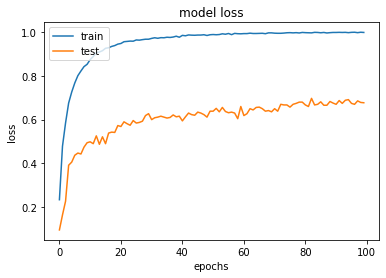

In [90]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel('epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show()